#Introduction

This project focuses on the analysis of the Ames Housing dataset, which contains detailed information on various features of residential homes in Ames. Decision Tree Regressor was used for this project. The primary objective of this analysis is to explore the dataset, clean and preprocess the data, visualize patterns, and build predictive model for house prices.

Importing necessary libraries

In [63]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset Loading

Reading the dataset and looking into the rows, columns and data type.

The Ames Housing dataset is used for this project. The dataset is loaded directly from an online source.

In [64]:
# Read the dataset
df = pd.read_csv("https://raw.githubusercontent.com/wblakecannon/ames/master/data/housing.csv")

In [65]:
# Looking into the data
df.head()

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [66]:
# Looking into basic info
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2930 non-null   int64  
 1   Order            2930 non-null   int64  
 2   PID              2930 non-null   int64  
 3   MS SubClass      2930 non-null   int64  
 4   MS Zoning        2930 non-null   object 
 5   Lot Frontage     2440 non-null   float64
 6   Lot Area         2930 non-null   int64  
 7   Street           2930 non-null   object 
 8   Alley            198 non-null    object 
 9   Lot Shape        2930 non-null   object 
 10  Land Contour     2930 non-null   object 
 11  Utilities        2930 non-null   object 
 12  Lot Config       2930 non-null   object 
 13  Land Slope       2930 non-null   object 
 14  Neighborhood     2930 non-null   object 
 15  Condition 1      2930 non-null   object 
 16  Condition 2      2930 non-null   object 
 17  Bldg Type     

(2930, 83)

In [67]:
# Printing all column names
print(list(df.columns))


['Unnamed: 0', 'Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive

#Data Cleaning

First, we look into missing data. We filled missing numerical columns with median to handle outliers effectively and filled missing categorical columns with mode to replace missing values with the most common category.

In [68]:
# Checking for missing values
print(df.isnull().sum().sort_values(ascending=False).head(10))

Pool QC          2917
Misc Feature     2824
Alley            2732
Fence            2358
Mas Vnr Type     1775
Fireplace Qu     1422
Lot Frontage      490
Garage Qual       159
Garage Cond       159
Garage Yr Blt     159
dtype: int64


In [69]:
# Filling missing numerical columns with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [70]:
# Filling missing categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

Next we check if there's any duplicate values and drop them.

In [71]:
# Removing duplicate rows if any
df.drop_duplicates(inplace=True)

Removing extreme SalePrice values, which are beyond 99 percentile to handle outlier.

In [72]:
# Removinh outlier SalePrice values
upper_limit = df['SalePrice'].quantile(0.99)
df = df[df['SalePrice'] <= upper_limit]

In [73]:
print("\nAfter cleaning:")
print(df.isnull().sum().sum(), "missing values left")
print("Dataset shape after cleaning:", df.shape)


After cleaning:
0 missing values left
Dataset shape after cleaning: (2900, 83)


#Exploring the Data

We do a Heatmap to see which variables show highest correlation. It shows that variables like Overall Qual, Gr Liv Area, Garage Cars, Total Bsmt SF show high correlation with SalePrice.

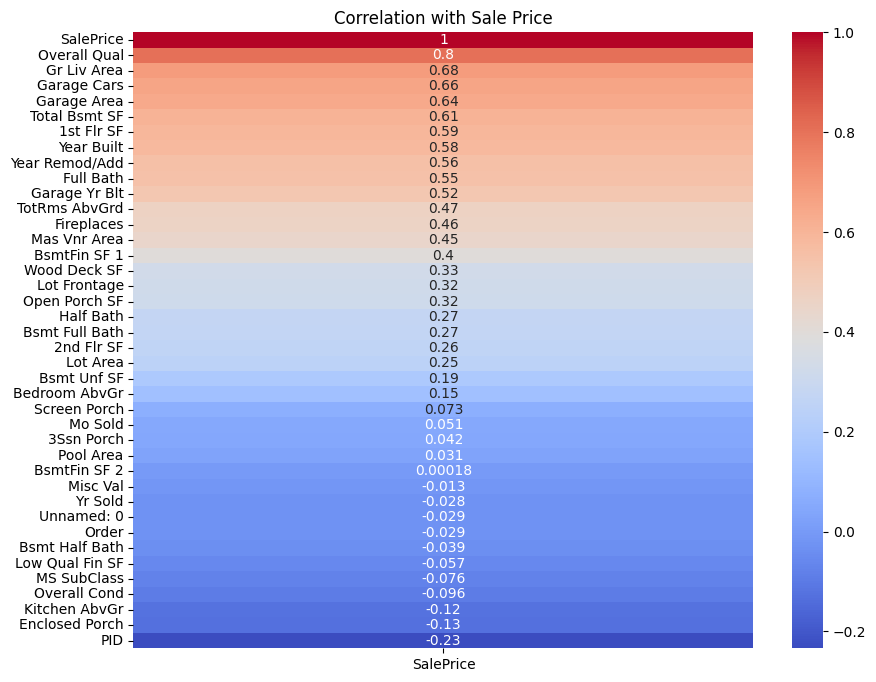

In [74]:
# Correlation Heatmap of numeric features to SalesPrice
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Sale Price")
plt.show()

Histogram of target variable SalePrice. The Histogram is right-skewed, meaning most houses are lower-priced.

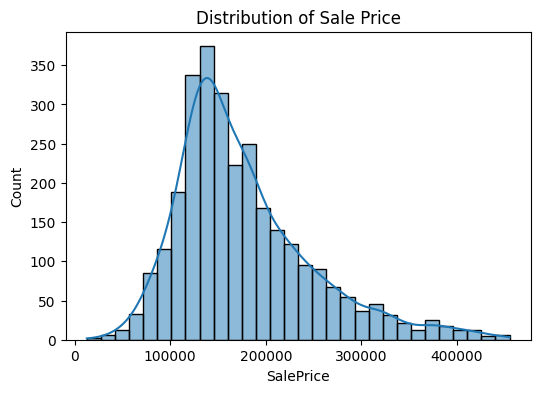

In [75]:
# Distribution of target variable
plt.figure(figsize=(6,4))
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title("Distribution of Sale Price")
plt.show()

We do a Boxplot to visualize Top Neighbouhoods by Average Sale Price.

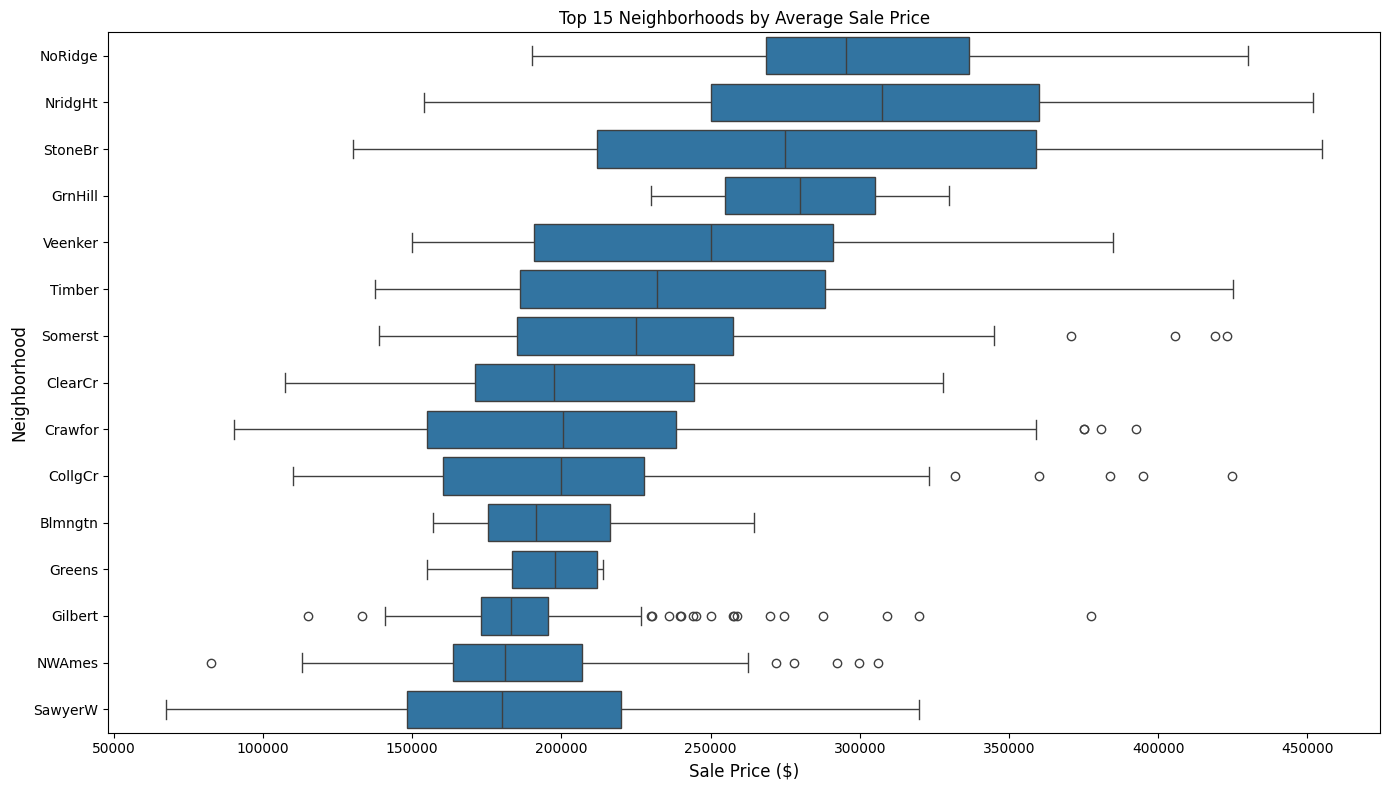

In [76]:
# Boxplot of top Neighbourhoods by Average Sale Price
plt.figure(figsize=(14, 8))
neighborhood_stats = df.groupby('Neighborhood')['SalePrice'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
top_neighborhoods = neighborhood_stats.head(15).index
df_top_neigh = df[df['Neighborhood'].isin(top_neighborhoods)]
sns.boxplot(data=df_top_neigh, y='Neighborhood', x='SalePrice',
            order=neighborhood_stats.head(15).index)
plt.xlabel('Sale Price ($)', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.title('Top 15 Neighborhoods by Average Sale Price')
plt.tight_layout()
plt.show()

#Modelling using Decision Tree Regressor

We will build a Decision Tree Regressor to predict house prices based on key features such as Overall Quality, Living area, Garage capacity, and Construction year.

Decision Tree Regressor is easy to interpret and can model non-linear relationships between target variable and other features effectively. It handles both numerical and categorical variables without requiring scaling, making it flexible for this mixed type dataset.

Importing required libraries and selecting key numeric features that influence SalePrice.

In [77]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

In [78]:
# Selecting a few important numeric features
features = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF','Year Built']
X = df[features]
y_skewed = df['SalePrice']

Previously we saw SalePrice distribution was right skewed. Hence we do a log transform on target variable SalePrice as it often makes errors more symmetric and stabilizes variance.

In [79]:
# Log transformation of target variable
y = np.log1p(y_skewed)

Splitting dataset into training and test sets

In [80]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Decision Trees are prone to overfitting if hyperparameters are chosen arbitrarily.
So, for the model we will use GridSearchCV, which tests multiple parameter combinations through cross-validation and selects the one that performs best on unseen data.

In [81]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse']
}

grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("✅ Best Parameters Found:", grid_search.best_params_)


✅ Best Parameters Found: {'criterion': 'squared_error', 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 10}


We look into predictions on training set.

In [82]:
# Predicting value of train set
y_train_pred = best_model.predict(X_train)

Next we check three metrics on training set to evaluate the model. R² score tells how well the model explains the variation in sale prices. MAE and MSE show the average prediction errors.


In [83]:
# Evaluating model performance
r2 = r2_score(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)

In [84]:
print("------ MODEL PERFORMANCE (TRAIN DATA ONLY) ------")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

------ MODEL PERFORMANCE (TRAIN DATA ONLY) ------
R² Score: 0.900
Mean Absolute Error: 0.09
Mean Squared Error: 0.02


The model has an R² of 0.9, meaning it explains about 90% of the variation in the target variable.
The MAE is 0.09, so predictions are off by around 0.09 units on average.
The MSE is 0.02, indicating that prediction errors are generally very small and the model rarely makes large mistakes.
Overall, the model fits the training data well and is much better than a simple baseline.


#Dummy Regressor

We compare it to a Dummy Regressor baseline, which predicts the mean of the target variable. This helps us understand whether our model is actually learning meaningful patterns or just performing at random.

A Dummy Regressor R² = 0 on the training set shows the model is learning meaningful patterns, since predicting the mean alone cannot achieve any improvement.

In [85]:
# Baseline comparison using Dummy Regressor
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
y_dummy_train_pred = dummy.predict(X_train)

r2_dummy = r2_score(y_train, y_dummy_train_pred)
print(f"\nBaseline Dummy Regressor R² (Train Data): {r2_dummy:.3f}")


Baseline Dummy Regressor R² (Train Data): 0.000


#Visual Evaluation

Visualizing residual distribution to assess model performance.

The residuals are centered around zero and form a roughly bell-shaped curve, meaning the model's predictions are mostly unbiased.However, the slightly wider tails suggest a few large errors, showing that some predictions deviate noticeably from actual values.

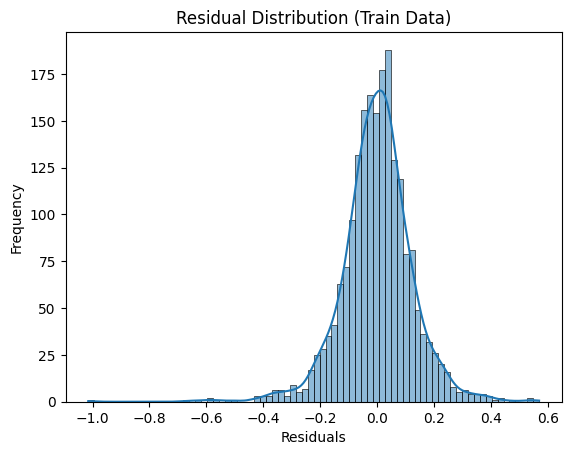

In [86]:
# Residual plot
residuals = y_train - y_train_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution (Train Data)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Plotting Actual vs Predicted Sale Prices to see how close the predictions are.

The scatter points follow a diagonal pattern, showing the model captures the general relationship between features and price. But predictions for lower-priced houses are more widely scattered and  some points deviate noticeably from the diagonal line. This means that the model is less accurate for predicting lower sale prices.

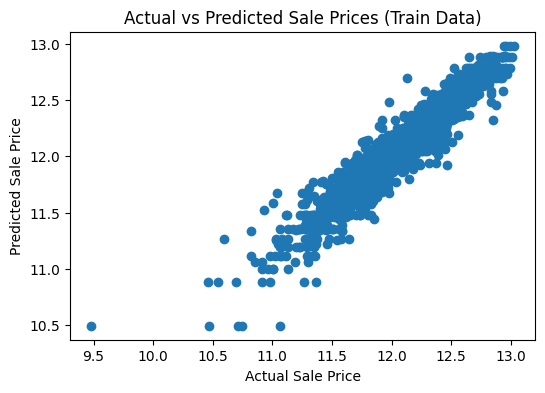

In [87]:
# Actual vs Predicted Sale Price
plt.figure(figsize=(6,4))
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Prices (Train Data)")
plt.show()

We visualize a Residual vs Predicted Values plot to check if residuals are randomly scattered.

Residuals are randomly scattered around zero, meaning there is no clear pattern or systematic bias in the predictions. The spread is wider for lower predicted prices, it means that the model's predictions are less consistent or accurate for cheaper houses.

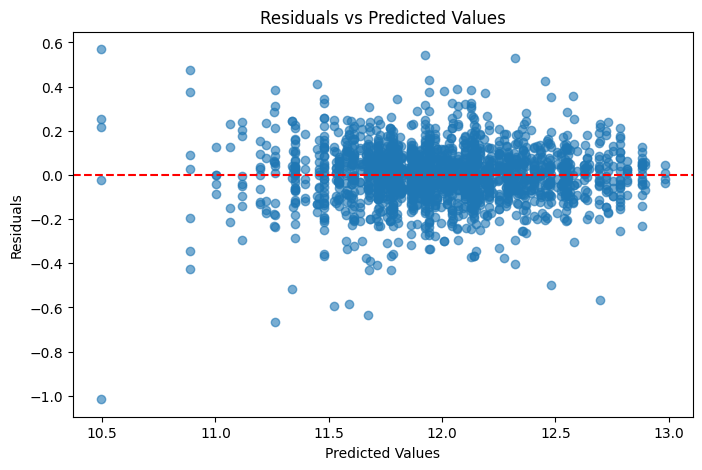

In [88]:
residuals = y_train - y_train_pred

plt.figure(figsize=(8,5))
plt.scatter(y_train_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

We can say that the model’s performance metrics and visual evaluations demonstrate that the chosen regression approach provides reliable predictions.